___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 8</p><h1>

 # Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

### Causes of Outliers

- Data entries errors
- FirstMeasurement errors or instrument errors
- Sampling errors
- Data processing error
- Natural novelties in data

### Guideline for Handling Outliers

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## Catching and Detecting Outliers

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names() #Seaborn içinde hagileri var bu şekilde görebiliriz

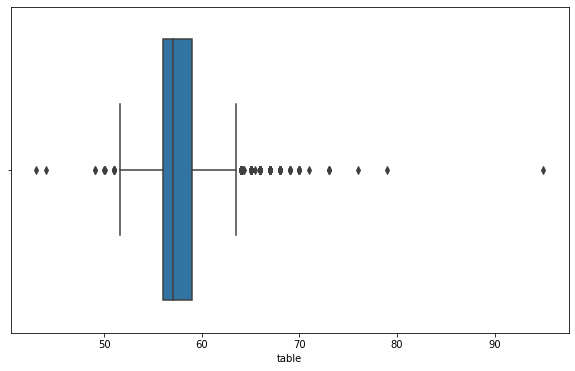

In [ ]:
plt.figure(figsize = (10, 6)) #Q1*1.5 a göre çizdirir
sns.boxplot(x = df.table)

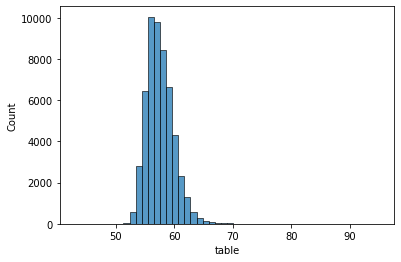

In [ ]:
sns.histplot(df.table, bins = 50, kde = False)

**info about dataset**
- **carat   :**Carat weight of the diamond
- **depth % :**The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table % :**The width of the diamond's table expressed as a percentage of its average diameter
- **price   :**the price of the diamond
- **x       :**length mm
- **y       :**width mm
- **z       :**higth mm

### Detecting Outliers with Graphs

In [ ]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.table.sort_values() #Üstten ve alttan gözükmeyen değerleri görebiliriz. Çünkü grafikten 50 nin altını ve 70 üstünü göremedik

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
         ... 
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, Length: 53940, dtype: float64

In [ ]:
df.table.sort_values().tail(10) #En küçük son 10 değeri gördük

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [ ]:
df.loc[df.table.sort_values().tail(10).index]

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


### Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [ ]:
Q1=df["table"].quantile(0.25)

In [ ]:
Q3=df["table"].quantile(0.75)

In [ ]:
IQR=Q3-Q1
IQR

3.0

In [ ]:
df.table.describe() #Yukardakileri kısayoldan görebilmek için

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [ ]:
lower_lim = Q1 - (IQR*1.5) #Bıyıklatı bulabilmek için
upper_lim = Q3 + (IQR*1.5)
lower_lim, upper_lim

(51.5, 63.5)

In [ ]:
(df.table>upper_lim).sum() #Üst limite kadar olan değerler toplamı

589

In [ ]:
(df.table<lower_lim).sum() #Alt limite kadar olan değerler toplamı

16

In [ ]:
df.table[(df.table>upper_lim) | (df.table<lower_lim)].count() #Alt ve Üst limit değerlerine kadar olanların toplamı. Yani outlier olanlar.

605

In [ ]:
df.table[~((df.table < lower_lim) | (df.table > upper_lim))].count() #Alt ve üst limitler arası değerler toplamı. Yani outlier olmayacaklar.

53335

## Removing the Outliers

### First way

In [ ]:
not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)
not_outliers

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [ ]:
df[not_outliers] #outlier olmayanları getirdi

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
cleaned_df = df[not_outliers] #Yeni bir data setine temizlenmiş olarak attık
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df[not_outliers] #Outlier olmayan değerler

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
cleaned_df = df[not_outliers] #Yeni outlier olmadan temizlenmiş data
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Second way

In [ ]:
outlier_index = df.loc[(df.table>upper_lim) | (df.table<lower_lim)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [ ]:
df.loc[(df.table>upper_lim) | (df.table<lower_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [ ]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


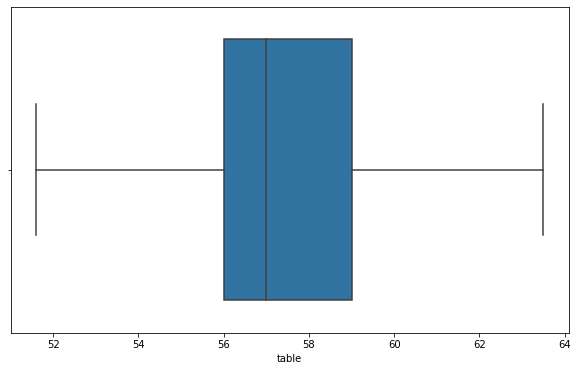

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = cleaned_df.table)

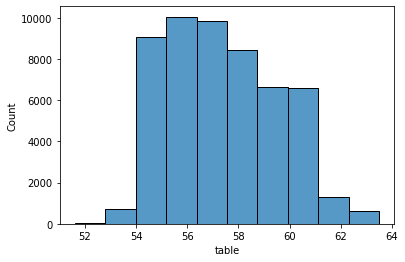

In [ ]:
sns.histplot(cleaned_df.table, bins = 10, kde = False)

In [ ]:
cleaned_df.table.describe() #Temizlenmiş halinin değerleri

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [ ]:
df.table.describe() #Orjinal data halinin değerleri

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## Limitation and Transformation of the Outliers

### Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively.

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
winsorize(df.table, (0.02, 0.05)) #Alttan ve üstten ne kadar % veri sıkıştırmak istiyorum. 0,25 ve 0,75 yazarsak q1 ve q3 e kadar gelmiş oluruz
                                  #upper_limet ve lower_limit değerlerinin hepsini alt ve üst limit değerlerine getirir.

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [ ]:
a=len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [ ]:
b = len(df.table[df.table>upper_lim])/len(df)
b

0.010919540229885057

In [ ]:
winsorize(df.table, (a,b))

masked_array(data=[51.6, 51.6, 51.6, ..., 51.6, 51.6, 51.6],
             mask=False,
       fill_value=1e+20)

In [ ]:
table_win = winsorize(df.table, (a,b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

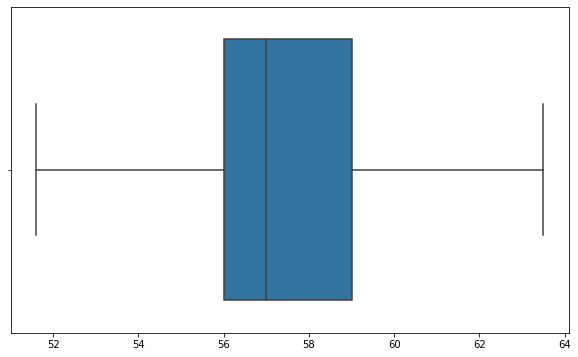

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = table_win)

In [ ]:
df_table_win = pd.Series(table_win)
df_table_win

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [ ]:
df_table_win.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

In [ ]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [ ]:
lower_lim, upper_lim

(51.5, 63.5)

In [ ]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [ ]:
df_table_win.sort_values().head(20) #Altta olan geğerlerin hepsini 51.6 ya eşitledi. Sıkıştırma işlemi yaptı yani

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [ ]:
df_table_win.sort_values().tail(20) #Üstte olan geğerlerin hepsini 63.5 e eşitledi. Sıkıştırma işlemi yaptı yani

10109    63.5
41649    63.5
6162     63.5
8302     63.5
41647    63.5
20647    63.5
40473    63.5
23195    63.5
28270    63.5
2272     63.5
3236     63.5
42905    63.5
23258    63.5
26777    63.5
38888    63.5
15862    63.5
5239     63.5
26773    63.5
35683    63.5
20756    63.5
dtype: float64

### ``log()`` Transformation

The Numpy.log() method lets you calculate the mathematical log of any number or array.
The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.

https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [89]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.8 MB


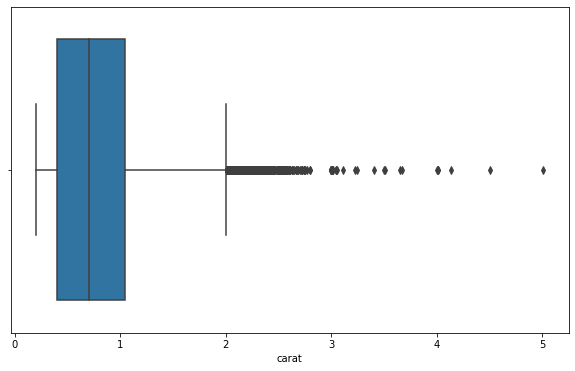

In [90]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = df.carat)

In [92]:
np.log(df.carat) #Sadece logaritmasını alalım

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

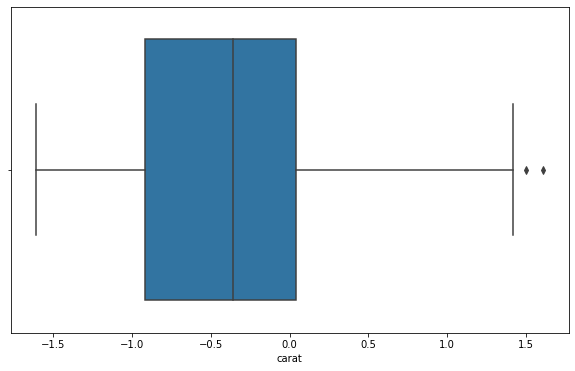

In [93]:
plt.figure(figsize = (10, 6)) #Log alınmış görüntü çok değişti. Outlier olabilecek değer sayısı çok azaldı
sns.boxplot(x = np.log(df.carat))

In [97]:
df["carat_log"] = np.log(df.carat) #Yeni bir sütun ekledik

In [98]:
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [99]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)
IQR = Q3-Q1

In [100]:
Q1, Q3, IQR

(-0.916290731874155, 0.03922071315328133, 0.9555114450274363)

In [101]:
lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)

In [102]:
lower_lim, upper_lim 

(-2.3495578994153097, 1.472487880694436)

In [103]:
df.loc[(df.carat_log > upper_lim)] #Sadece upper outlier olduğu için lower a gerek yok

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [105]:
outlier_index = df.loc[(df.carat_log > upper_lim)].index
outlier_index

Int64Index([27415, 27630], dtype='int64')

In [106]:
df.drop(outlier_index) #53940 den 53939 e düştü

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [107]:
df_cleaned = df.drop(outlier_index) #Outlier lardan temilenmiş son hali
df_cleaned

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


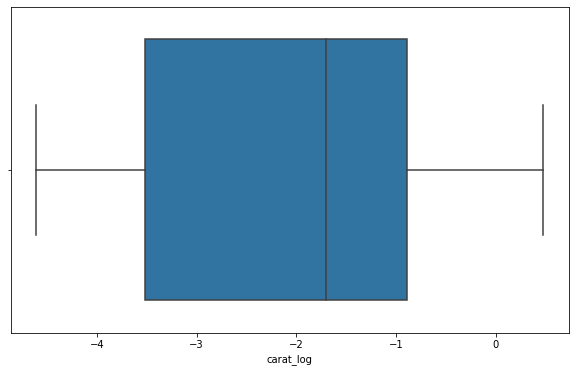

In [110]:
plt.figure(figsize = (10, 6)) #Temizlenmiş halinde iki outleir yok artık
sns.boxplot(x = np.log(df.carat_log))